In [1]:
!pip install xgboost

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('cancer dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = df.drop(['id','Unnamed: 32'], axis='columns')

In [6]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [7]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)


In [9]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.50)

In [10]:
import xgboost as xgb

In [11]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [12]:
y_pred_xgb = xgb_model.predict(X_test)

In [13]:
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb), '\n')
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model Performance:
Accuracy: 0.9764705882352941 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        37

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [14]:
xgb_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}


In [15]:
xgb_grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_grid=xgb_params, cv=5)
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [16]:
y_pred_xgb_gs = xgb_grid_search.predict(X_test)
print("\nXGBoost Grid Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_gs))


XGBoost Grid Search Performance:
Accuracy: 0.9647058823529412
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.97      0.95      0.96        37

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [17]:
xgb_random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42), 
                                       param_distributions=xgb_params, n_iter=100, cv=5, random_state=42)

In [18]:
xgb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42)

In [19]:
y_pred_xgb_rs = xgb_random_search.predict(X_test)
print("\nXGBoost Randomized Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_rs))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_rs))


XGBoost Randomized Search Performance:
Accuracy: 0.9764705882352941
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        37

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [20]:
print("\nBest hyperparameters from Grid Search:", xgb_grid_search.best_params_)
print("Best hyperparameters from Randomized Search:", xgb_random_search.best_params_)


Best hyperparameters from Grid Search: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Best hyperparameters from Randomized Search: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.15, 'colsample_bytree': 0.9}


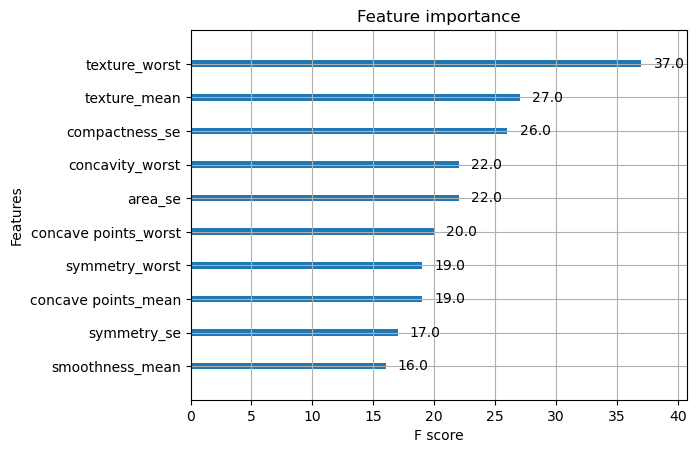

In [21]:
xgb.plot_importance(xgb_random_search.best_estimator_, max_num_features=10)
plt.show()

# ADA Boost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [24]:
y_pred_ada = ada_model.predict(X_test)

In [25]:
print("AdaBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada), '\n')
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

AdaBoost Model Performance:
Accuracy: 0.9647058823529412 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.97      0.95      0.96        37

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [26]:
ada_params = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
}

In [27]:
ada_grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), param_grid=ada_params, cv=5)
ada_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [28]:
y_pred_ada_gs = ada_grid_search.predict(X_test)
print("\nAdaBoost Grid Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_ada_gs))


AdaBoost Grid Search Performance:
Accuracy: 0.9764705882352941
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        37

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [29]:
ada_random_search = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=42), 
                                       param_distributions=ada_params, n_iter=100, cv=5, random_state=42)
ada_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.5, 1.0],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=42)

In [30]:
y_pred_ada_rs = ada_random_search.predict(X_test)
print("\nAdaBoost Randomized Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada_rs))
print("Classification Report:")
print(classification_report(y_test, y_pred_ada_rs))


AdaBoost Randomized Search Performance:
Accuracy: 0.9764705882352941
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        37

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [31]:
print("\nBest hyperparameters from Grid Search:", ada_grid_search.best_params_)
print("Best hyperparameters from Randomized Search:", ada_random_search.best_params_)


Best hyperparameters from Grid Search: {'learning_rate': 1.0, 'n_estimators': 250}
Best hyperparameters from Randomized Search: {'n_estimators': 250, 'learning_rate': 1.0}


# CatBoost

In [35]:
! pip install catboost

In [36]:
from catboost import CatBoostClassifier

In [37]:
cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

In [38]:
y_pred_cat = cat_model.predict(X_test)

In [39]:
print("CatBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat), '\n')
print("Classification Report:")
print(classification_report(y_test, y_pred_cat))

CatBoost Model Performance:
Accuracy: 0.9647058823529412 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.97      0.95      0.96        37

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [40]:
cat_params = {
    'iterations': [100, 200, 300, 400, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [41]:
cat_grid_search = GridSearchCV(estimator=CatBoostClassifier(random_state=42, verbose=0), param_grid=cat_params, cv=5)
cat_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000027D9E9E8890>,
             param_grid={'depth': [4, 6, 8, 10],
                         'iterations': [100, 200, 300, 400, 500],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2]})

In [42]:
y_pred_cat_gs = cat_grid_search.predict(X_test)
print("\nCatBoost Grid Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_cat_gs))


CatBoost Grid Search Performance:
Accuracy: 0.9647058823529412
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.97      0.95      0.96        37

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [ ]:
cat_random_search = RandomizedSearchCV(estimator=CatBoostClassifier(random_state=42, verbose=0), 
                                       param_distributions=cat_params, n_iter=100, cv=5, random_state=42)
cat_random_search.fit(X_train, y_train)

In [ ]:
y_pred_cat_rs = cat_random_search.predict(X_test)
print("\nCatBoost Randomized Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat_rs))
print("Classification Report:")
print(classification_report(y_test, y_pred_cat_rs))

In [ ]:
print("\nBest hyperparameters from Grid Search:", cat_grid_search.best_params_)
print("Best hyperparameters from Randomized Search:", cat_random_search.best_params_)